In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH = '../data/dogbreeds/'
sz = 224
arch = resnext101_64
bs = 58

In [3]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv',
                                        test_name='test', val_idxs=val_idxs,
                                        suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp')

In [5]:
data = get_data(sz,bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [6]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [7]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 117/141 [00:02<00:00, 49.23it/s, loss=10.5]


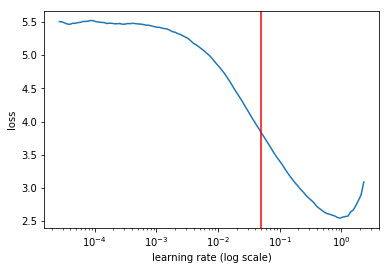

In [8]:
learn.sched.plot()
plt.axvline(x=5e-2, color="red");

In [9]:
learn.fit(1e-1, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.715795   0.421999   0.883142  
    1      0.396208   0.431458   0.891626                    
    2      0.274169   0.3415     0.904215                    
    3      0.203836   0.31197    0.911398                    
    4      0.162242   0.424805   0.909004                    



[0.424805, 0.9090038355853822]

In [6]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))


100%|██████████| 36/36 [00:48<00:00,  1.36s/it]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 124/141 [00:01<00:00, 65.43it/s, loss=11.7]


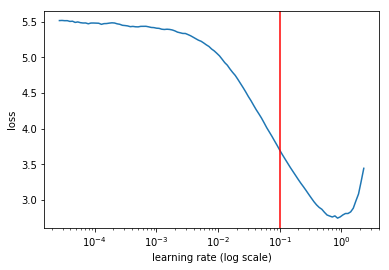

In [20]:
lrf=learn.lr_find()
learn.sched.plot()
plt.axvline(x=1e-1, color="red");

In [10]:
learn.fit(1e-1, 2)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.758626   0.423221   0.889368  
    1      0.503891   0.332304   0.905172                    



[0.33230352, 0.9051724175612131]

In [7]:
learn.precompute=False

In [11]:
learn.fit(1e-1, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.350678   0.252257   0.922414  
    1      0.321496   0.253182   0.921935                    
    2      0.272586   0.256399   0.920977                    
    3      0.26826    0.247527   0.924808                    
    4      0.258099   0.253025   0.92433                     



[0.25302458, 0.9243295010593202]

In [12]:
learn.save('224_pre_lr-1e1')

In [39]:
learn.load('224_pre_lr-1e1')

In [7]:
learn.set_data(get_data(299, bs))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [45]:
learn.load('299_pre_2')

In [46]:
learn.fit(1e-2, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.213105   0.214129   0.929119  
    1      0.19243    0.209936   0.931992                    



[0.20993558, 0.9319923420747122]

In [51]:
learn.fit(1e-2, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.196547   0.209361   0.931992  
    1      0.184407   0.208242   0.929598                    



[0.20824182, 0.929597708914015]

In [52]:
learn.save('299_pre_3')

In [53]:
%%time
test = learn.predict(is_test=True)

CPU times: user 7min 50s, sys: 35.2 s, total: 8min 25s
Wall time: 7min 14s


In [54]:
columns = pd.read_csv(f'{PATH}sample_submission.csv', index_col='id').columns
test = pd.DataFrame(np.exp(test))
test.columns = columns
test.index = [i.split('.jpg')[0].split('/')[-1] for i in data.test_dl.dataset.fnames]
test.index.name ='id'
test.to_csv(f'{PATH}submission3.csv')

In [55]:
pd.read_csv(f'{PATH}submission3.csv').head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,1.043266e-06,8.584272e-06,2.365846e-07,3.530921e-07,3.883167e-08,3.278479e-08,1.146113e-07,1.042849e-07,7.658031e-08,...,6.135443e-09,1.990608e-08,8.425136e-08,9.060479e-08,4.373770e-07,5.089899e-08,4.680950e-07,5.182781e-06,5.592763e-08,4.684762e-08
1,6b423ca7020e70eb05732843c5d2bad1,5.899580e-08,4.197802e-07,6.221638e-08,4.052236e-08,8.375750e-09,5.034674e-10,2.210212e-08,2.218316e-09,3.001973e-08,...,1.072871e-09,1.813796e-09,1.566746e-09,2.451213e-09,3.113831e-09,1.853989e-08,1.320946e-06,5.411601e-08,1.843999e-07,3.702735e-09
2,74aa7e201e0e93e13e87b986a7d31839,1.127665e-05,3.927221e-06,5.710962e-06,2.413565e-03,1.568055e-05,2.461584e-06,2.505439e-05,4.552790e-06,4.916668e-06,...,9.679588e-06,1.419192e-05,3.958216e-06,7.375819e-06,4.614512e-06,3.037656e-05,7.139282e-06,4.294517e-06,3.255562e-01,2.524007e-06
3,a079f72193264bc5685e5d28d7372680,8.992286e-06,4.340552e-07,1.753953e-06,3.533281e-06,4.557805e-07,5.528723e-08,6.410930e-06,5.235032e-07,3.597496e-06,...,2.479884e-07,4.076298e-06,1.998111e-06,1.431883e-07,1.244616e-06,1.818170e-06,1.827719e-05,3.754931e-07,4.562243e-04,3.548187e-05
4,583f7580fa5fec1266331fcf83b76fd6,1.114707e-07,7.462274e-09,2.331897e-10,6.900982e-07,1.487036e-09,3.047590e-08,8.756357e-09,6.525866e-09,3.792325e-11,...,1.644232e-09,7.306351e-09,4.897759e-11,4.886750e-10,1.496594e-09,4.778963e-09,7.017044e-10,1.624698e-09,5.607744e-06,3.504883e-09


In [9]:
learn.set_data(get_data(299, bs))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 117/141 [04:57<01:00,  2.54s/it, loss=0.636]

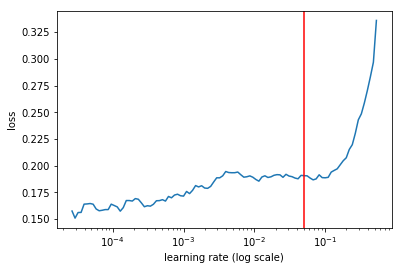

In [11]:
learn.sched.plot()
plt.axvline(x=5e-2, color="red");

In [19]:
%%time
test = learn.predict(is_test=True)

CPU times: user 10min 56s, sys: 52 s, total: 11min 48s
Wall time: 9min 51s


In [20]:
columns = pd.read_csv(f'{PATH}sample_submission.csv', index_col='id').columns
test = pd.DataFrame(np.exp(test))
test.columns = columns
test.index = [i.split('.jpg')[0].split('/')[-1] for i in data.test_dl.dataset.fnames]
test.index.name ='id'
test.to_csv(f'{PATH}submission4.csv')
pd.read_csv(f'{PATH}submission4.csv').head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,1.498188e-08,5.691359e-07,5.556810e-09,8.774347e-09,1.570622e-10,2.421850e-10,4.596933e-10,2.531344e-09,4.302420e-10,...,2.496345e-11,2.399911e-10,6.376381e-10,1.110612e-09,4.896101e-09,2.086089e-10,3.552162e-09,6.459850e-08,5.217748e-10,2.329643e-10
1,6b423ca7020e70eb05732843c5d2bad1,2.050259e-07,6.626099e-07,6.596462e-08,7.022741e-08,2.109909e-08,2.708673e-10,2.989790e-08,4.621957e-09,1.682018e-08,...,2.906426e-09,9.207699e-10,2.438324e-09,3.935434e-09,3.468844e-09,5.480874e-09,1.578319e-06,3.570197e-08,1.305056e-07,4.516069e-09
2,74aa7e201e0e93e13e87b986a7d31839,7.253006e-07,3.583544e-07,6.496953e-07,7.793792e-04,6.305783e-07,1.367819e-07,2.021304e-06,7.549986e-07,7.529306e-07,...,6.863682e-07,1.216197e-06,1.487831e-06,1.000336e-06,8.580307e-07,6.426748e-06,9.354560e-07,1.724824e-06,1.908360e-01,2.345171e-07
3,a079f72193264bc5685e5d28d7372680,1.856343e-04,4.221398e-06,4.639063e-06,2.209497e-05,2.998622e-06,5.917287e-07,4.096538e-05,3.360444e-06,1.003612e-05,...,2.406978e-06,3.851165e-05,1.551455e-05,1.583195e-06,8.783025e-06,4.769136e-06,1.770219e-04,2.146260e-06,3.404261e-03,4.360185e-04
4,583f7580fa5fec1266331fcf83b76fd6,5.204971e-08,1.017557e-08,3.260995e-10,4.418895e-07,2.441284e-09,9.380896e-09,5.583793e-10,5.754496e-10,4.690352e-11,...,8.123833e-09,4.287235e-09,8.451019e-11,1.386640e-10,2.457153e-09,2.640125e-09,5.166431e-10,2.485605e-09,4.185929e-07,2.276581e-09
